In [12]:
import json
import os
import itertools
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8,5

from grave import plot_network
import seaborn as sns

# Metacartel Ventures Voting Network

Those who vote together have strong bonds. This analysis uses Metacartel Ventures voting data to identify which members (wallet addresses) have the strongest voting patterns together. 

If they vote the same on a proposal, their bond is increased by one.

If they vote different on a proposal, their bond is decreased by one.

In [13]:
# Load data
with open("./data/10884668-results.json", "r") as f:
    array = json.load(f)
f.close()

In [14]:
# Initialize an empty Graph
G = nx.Graph()

### Create the member voting network

In [15]:
for proposal in array["data"]["moloches"][0]["proposals"]:
    voters = list([ \
        (voter["id"].split("-")[2],voter["uintVote"]) for voter in proposal["votes"] \
        ])
    edges = list(itertools.combinations(voters, 2))
    for pair in edges:
        # if members voted the same on a proposal add 1 to their edge weight, otherwise subtract 1
        if G.has_edge(pair[0][0], pair[1][0]):
            if pair[0][1] == pair[1][1]:
                G[pair[0][0]][pair[1][0]]["weight"] += 1
            else:
                G[pair[0][0]][pair[1][0]]["weight"] -= 1
        else:
            if pair[0][1] == pair[1][1]:
                G.add_edge(pair[0][0], pair[1][0], weight = 1)
            else:
                G.add_edge(pair[0][0], pair[1][0], weight = -1)
    edges=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))

### Visualize the voting network

In [16]:
# Create dataframe for analysis
df = pd.DataFrame.from_records([(a, b, c["weight"]) for (a, b, c) in G.edges(data=True)], columns =['member_0', 'member_1', 'weight'])

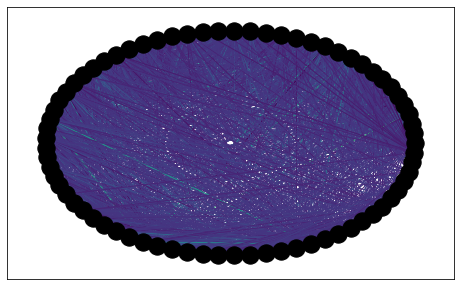

In [17]:
fig, ax = plt.subplots()
pos = nx.circular_layout(G)

max_edge = max([e[2]["weight"] for e in G.edges(data=True)])

edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
edges=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))

nx.draw_networkx(G, pos=pos, node_color='k', edge_color=weights, with_labels=False, cmap=plt.cm.coolwarm, vmin=0, vmax=max_edge)

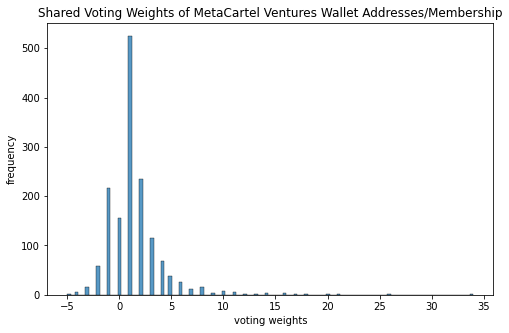

In [18]:
ax = sns.histplot(df, x="weight")
ax.set(title = "Shared Voting Weights of MetaCartel Ventures Wallet Addresses/Membership", xlabel = "voting weights", ylabel = "frequency")
plt.show()

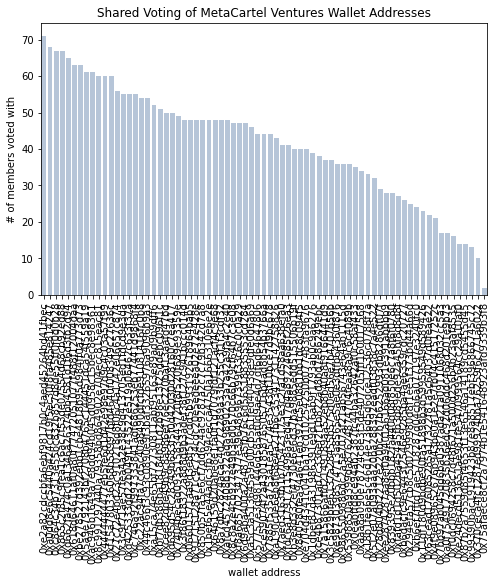

In [19]:
# G.edges("0x865c2f85c9fea1c6ac7f53de07554d68cb92ed88")
rows = []
for n in G.nodes():
    record = {"wallet": n, "num_shared_votes": len(G.edges(n))}
    rows.append(record)
#     print(n, len(G.edges(n)))

df_shared_votes = pd.DataFrame.from_dict(rows, orient = "columns").sort_values("num_shared_votes", ascending=False)
df_shared_votes["num_shared_votes"]

ax = sns.barplot(x="wallet", y="num_shared_votes", data=df_shared_votes, color="lightsteelblue")
ax.set(title = "Shared Voting of MetaCartel Ventures Wallet Addresses", xlabel = "wallet address", ylabel = "# of members voted with")
plt.xticks(rotation=90)
plt.show()

In [20]:
# for d in G.degree():
#     print(d[1])
sns.
pd.DataFrame.from_dict(G.degree())

SyntaxError: invalid syntax (2379446905.py, line 3)

In [ ]:
# G = nx.gnp_random_graph(10,0.3)
# for u,v,d in G.edges(data=True):
#     d['weight'] = random.random()

# edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

# pos = nx.spring_layout(G)
# nx.draw(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.RdYlGn)
# plt.savefig('edges.png')

In [21]:
df.sort_values("weight", ascending=False)

,member_0,member_1,weight
55,0x865c2f85c9fea1c6ac7f53de07554d68cb92ed88,0xc864c34b7313e55bc832b857d8de55ff0f0d0b28,34
174,0xc864c34b7313e55bc832b857d8de55ff0f0d0b28,0xe2a82cdccbfa6ebf9817b0c4aed45264bd41fbec,26
207,0xc864c34b7313e55bc832b857d8de55ff0f0d0b28,0xbe278527d392ebb1cbe4818b95d984ff0a773d73,21
172,0xc864c34b7313e55bc832b857d8de55ff0f0d0b28,0xa0dd8e6c5440a424cd19f5ec30f8fa485e814247,21
2,0x44c466f3c93c0890e9f3baf33265976a9096b9a3,0xc864c34b7313e55bc832b857d8de55ff0f0d0b28,20
...,...,...,...
371,0x4444444477eb5fe6d1d42e98e97d9c4c03a57f99,0xee2874287aa8ef0a9401a6166ad081e391abbbb9,-4
188,0xc864c34b7313e55bc832b857d8de55ff0f0d0b28,0x8a7dbc2824acac4d272289a33b255c3f1f3cdf32,-4
133,0x91715128a71c9c734cdc20e5edeeea02e72e428e,0x4444444477eb5fe6d1d42e98e97d9c4c03a57f99,-4
433,0x618d64611af0a80f77472051077f488f12004daa,0x8c991297440a79358bd864902e704ecc815eac81,-4


In [22]:
df["member_0"].nunique()

65

In [23]:
df["member_1"].nunique()

72

In [24]:
df.groupby("member_0").count()

,member_1,weight
member_0,,
0x06601571aa9d3e8f5f7cdd5b993192618964bab5,35,35
0x0eabffd8ce94ab2387fc44ba32642af0c58af433,11,11
0x11df180d9bdbe90fa51898b3d59959549d589426,6,6
0x18b1fea6e5c46d14e736d5d6dce12536c0788f7a,2,2
0x1bef65e44adc3fb394cecca4750a1666310e6e2e,18,18
...,...,...
0xf0dc0694258c7d48f671a500d256b4b23aaf8535,10,10
0xf15a780336068b58997bfd4640f008349c27636c,13,13
0xf8a685702347377e396486967399f33c6c0c0a29,27,27


In [25]:
df[df["member_0"] == "0x06601571aa9d3e8f5f7cdd5b993192618964bab5"]

,member_0,member_1,weight
697,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0x840580fea94a641eb392fc5e0881bb1dc8c094f5,0
698,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0x3c9f71ae57fea4a2e38c9d413705ed1fdcd9e3da,-2
699,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0x3f86f18322a888d9b3adef38f127c941bccc014d,1
700,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0x28d804bf2212e220bc2b7b6252993db8286df07f,1
701,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0x294efa57cb8c5b0299980d8f1ee5f373bd44a66d,2
702,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0x57757e3d981446d585af0d9ae4d7df6d64647806,0
703,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0x8a7dbc2824acac4d272289a33b255c3f1f3cdf32,1
704,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0x8c991297440a79358bd864902e704ecc815eac81,1
705,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0xf8a685702347377e396486967399f33c6c0c0a29,2
706,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0xc22ac94fa7cd5c40a8490dfcfde91081416fc0b8,-2


In [26]:
df[df["member_1"] == "0x06601571aa9d3e8f5f7cdd5b993192618964bab5"]

,member_0,member_1,weight
49,0x44c466f3c93c0890e9f3baf33265976a9096b9a3,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,-1
58,0x865c2f85c9fea1c6ac7f53de07554d68cb92ed88,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,3
124,0x91715128a71c9c734cdc20e5edeeea02e72e428e,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0
177,0xc864c34b7313e55bc832b857d8de55ff0f0d0b28,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,2
231,0x1dbef87da31986391e9d16ab9f1793ab0c9a6276,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,-1
265,0xd695d54c28349b683f5f0d42030d28160c7ea417,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,-1
325,0x4444444477eb5fe6d1d42e98e97d9c4c03a57f99,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,1
377,0x5a9e792143bf2708b4765c144451dca54f559a19,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0
465,0x618d64611af0a80f77472051077f488f12004daa,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,0
482,0xa0dd8e6c5440a424cd19f5ec30f8fa485e814247,0x06601571aa9d3e8f5f7cdd5b993192618964bab5,-2


In [27]:
df[["member_0", "member_1"]].nunique()

member_0    65
member_1    72
dtype: int64